In [223]:
import math
#numpy is numerical python, which lets us do math!
import numpy as np
#pandas is for reading in and manipulating dataframe
import pandas as pd
#matplotlib is a plotting library the originated in matlab
from matplotlib import pyplot as plt
#seaborn wraps around matplotlib so that we can make pretty plots more easliy
import seaborn as sns
#this little line of code lets us see the plots in the notebook
%matplotlib inline
#this uses seaborn (sns) to set the style for all the plots
sns.set_style(style='whitegrid')
from os.path import join
from scipy.stats import pearsonr

#less important for plotting
from glob import glob
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from statsmodels.sandbox.stats.multicomp import multipletests
from nilearn.mass_univariate import permuted_ols

In [2]:
def calculate_pvalues(df):
    from scipy.stats import pearsonr
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [245]:
#Li & Ji (2005) method for multiple comparisons corrections
#calculating number of effective comparisons M_eff
def jili_sidak_mc(data, alpha):
    import math
    import numpy as np
    
    mc_corrmat = data.corr()
    eigvals, eigvecs = np.linalg.eig(mc_corrmat)

    M_eff = 0
    for eigval in eigvals:
        if abs(eigval) >= 0:
            if abs(eigval) >= 1:
                M_eff += 1
            else:
                M_eff += abs(eigval) - math.floor(abs(eigval))
        else:
            M_eff += 0
    print('Number of effective comparisons: {0}'.format(M_eff))

    #and now applying M_eff to the Sidak procedure
    alpha = 0.05
    sidak_p = 1 - (1 - alpha)**(1/M_eff)
    if sidak_p < 0.00001:
        print('Critical value of {:.3f}'.format(alpha),'becomes {:2e} after corrections'.format(sidak_p))
    else:
        print('Critical value of {:.3f}'.format(alpha),'becomes {:.6f} after corrections'.format(sidak_p))
    return sidak_p, M_eff

In [2]:
data_dir = '/Users/Katie/Dropbox/Projects/physics-retrieval/data/out'

In [164]:
data_dir = '/Users/Katie/Dropbox/Projects/physics-retrieval/data'
df = pd.read_csv(join(data_dir, 'iq+brain+demo.csv'), index_col=0, header=0)
df_ladies = df[df['Sex'] == 'F']
df_ladies = df_ladies.drop('Sex', axis=1)
df_dudes = df[df['Sex'] == 'M']
df_dudes = df_dudes.drop('Sex', axis=1)

df_ladies['const'] = 1
df_dudes['const'] = 1

In [165]:
df = df.replace({'M':0, 'F':1})
df['const'] = 1
df['sexXIQ'] = df['Sex'] * df['Full Scale IQ_2']
df['SexXGrade'] = df['Sex'] * df['Phy48Grade']

In [252]:
df.keys()

Index(['Sex', 'AgeOnScanDate', 'Phy48Grade', 'GPA.PreSem',
       'fc default mode-left central executive gen',
       'fc default mode-left central executive phy',
       'fc default mode-right central executive gen',
       'fc default mode-right central executive phy',
       'fc hippo-default mode gen', 'fc hippo-default mode phy',
       'fc hippo-left central executive gen',
       'fc hippo-left central executive phy',
       'fc hippo-right central executive gen',
       'fc hippo-right central executive phy',
       'fc left central executive-right central executive gen',
       'fc left central executive-right central executive phy',
       'global efficiency gen', 'global efficiency phy', 'le default mode gen',
       'le default mode phy', 'le left central executive gen',
       'le left central executive phy', 'le right central executive gen',
       'le right central executive phy', 'Verbal Comprehension Sum_2',
       'Perceptual Reasoning Sum_2', 'Full Scale IQ_2', 'con

In [176]:
conn = ['fc default mode-left central executive gen',
       'fc default mode-left central executive phy',
       'fc default mode-right central executive gen',
       'fc default mode-right central executive phy',
       'fc hippo-default mode gen', 'fc hippo-default mode phy',
       'fc hippo-left central executive gen',
       'fc hippo-left central executive phy',
       'fc hippo-right central executive gen',
       'fc hippo-right central executive phy',
       'fc left central executive-right central executive gen',
       'fc left central executive-right central executive phy']

In [177]:
eff = ['global efficiency gen', 'global efficiency phy', 'le default mode gen',
       'le default mode phy', 'le left central executive gen',
       'le left central executive phy', 'le right central executive gen',
       'le right central executive phy']

In [345]:
labels = ['Limbic', 'Orbitofrontal', 'Basal Ganglia', 'Salience', 'Hunger', 
          'Motor Learning', 'Frontoparietal', 'Hand', 'Motor Execution', 'Higher Order Visual', 
          'Lateral Visual', 'Medial Visual', 'Default Mode',' Cerebellum', 'Central Executive (left)', 
          'Auditory', 'Mouth', 'Central Executive (right)']

In [101]:
subjects = ['101', '102', '103', '104', '106', '107', '108', '110', '212',
            '214', '215', '216', '217', '218', '219', '320', '321', '323',
            '324', '325', '327', '328', '330', '331', '333', '334',
            '335', '336', '337', '338', '339', '340', '341', '342', '343', '344',
            '345', '346', '347', '348', '349', '350', '451', '453', '455',
            '458', '459', '460', '462', '463', '464', '465', '467',
            '468', '469', '470', '502', '503', '571', '572', '573', '574',
            '577', '578', '581', '582', '584', '585', '586', '587',
            '588', '589', '591', '592', '593', '594', '595', '596', '597',
            '598', '604', '605', '606', '607', '608', '609', '610', '612',
            '613', '614', '615', '617', '618', '619', '620', '621', '622',
            '623', '624', '625', '626', '627', '629', '630', '631', '633',
            '634']

#subjects = ['101', '102']

In [269]:
demo_iq = ['const', 'Sex', 'Full Scale IQ_2', 'sexXIQ']
academic = ['const', 'Sex', 'Phy48Grade', 'SexXGrade']
non_brain = ['const','Sex', 'Verbal Comprehension Sum_2', 'Perceptual Reasoning Sum_2', 
             'Full Scale IQ_2', 'sexXIQ', 'Phy48Grade', 'SexXGrade', 'AgeOnScanDate']

## Mass univariate testing via permutations (defunct)
Retains all the dependencies of the initial data in the null distributions, often too conservative

In [215]:
#i want a mass univariate analysis of relationships between sex, IQ, and connectivity
conn_iqxsex = permuted_ols(df[demo_iq].values, df[conn].values, df['AgeOnScanDate'].values.reshape(107,1), 
                           model_intercept=True)
#i want a mass univariate analysis of relationships between sex, Grade, and connectivity
conn_gradexsex = permuted_ols(df[academic].values, df[conn].values, df['AgeOnScanDate'].values.reshape(107,1), 
                              model_intercept=True)
connectivity = pd.DataFrame({'Grade (all)': 10**-conn_gradexsex[0][1].T.reshape(12,), 
                             'IQ (all)': 10**-conn_iqxsex[0][1].T.reshape(12,),
                             'GradeXSex (all)': 10**-conn_gradexsex[0][2].T.reshape(12,), 
                             'IQXSex (all)': 10**-conn_iqxsex[0][2].T.reshape(12,)}, 
                            index=conn)

conn_iq_ladies = permuted_ols(df_ladies['Full Scale IQ_2'].values, df_ladies[conn].values, model_intercept=True)
connectivity['IQ (ladies)'] = 10**-conn_iq_ladies[0].T.reshape(12,)
conn_iq_dudes = permuted_ols(df_dudes['Full Scale IQ_2'].values, df_dudes[conn].values, model_intercept=True)
connectivity['IQ (dudes)'] = 10**-conn_iq_dudes[0].T.reshape(12,)

conn_grade_ladies = permuted_ols(df_ladies['Phy48Grade'].values, df_ladies[conn].values, model_intercept=True)
connectivity['Grade (ladies)'] = 10**-conn_grade_ladies[0].T.reshape(12,)
conn_grade_dudes = permuted_ols(df_dudes['Phy48Grade'].values, df_dudes[conn].values, model_intercept=True)
connectivity['Grade (dudes)'] = 10**-conn_grade_dudes[0].T.reshape(12,)

connectivity

,Grade (all),IQ (all),GradeXSex (all),IQXSex (all),IQ (ladies),IQ (dudes),Grade (ladies),Grade (dudes)
fc default mode-left central executive gen,1.000000,0.933507,1.000000,0.999900,0.915408,1.000000,0.999600,0.997400
fc default mode-left central executive phy,0.884312,0.999300,0.995500,0.965303,0.892411,0.541146,1.000000,0.514049
fc default mode-right central executive gen,0.972103,0.303870,0.998600,0.801120,0.445455,0.999900,0.524948,0.985201
fc default mode-right central executive phy,1.000000,1.000000,1.000000,0.999900,0.755624,0.998600,1.000000,1.000000
fc hippo-default mode gen,1.000000,1.000000,1.000000,0.999900,0.993401,1.000000,1.000000,1.000000
fc hippo-default mode phy,0.497350,1.000000,0.739526,0.230577,0.832617,0.999900,0.990401,0.824818
fc hippo-left central executive gen,0.975002,0.999500,1.000000,1.000000,0.987401,1.000000,1.000000,0.787221
fc hippo-left central executive phy,0.707729,0.999900,0.447655,0.163084,0.807219,0.973903,1.000000,0.778922
fc hippo-right central executive gen,1.000000,0.843616,1.000000,1.000000,0.748425,1.000000,0.999900,1.000000
fc hippo-right central executive phy,0.995100,0.998000,0.998500,0.876412,0.503350,1.000000,0.999900,1.000000


In [216]:
#i want a mass univariate analysis of relationships between sex, Grade, and efficiency
eff_gradexsex = permuted_ols(df[academic].values, df[eff].values, 
                             df['AgeOnScanDate'].values.reshape(107,1), 
                             model_intercept=True)

#i want a mass univariate analysis of relationships between sex, IQ, and efficiency
eff_iqxsex = permuted_ols(df[demo_iq].values, df[eff].values, 
                          df['AgeOnScanDate'].values.reshape(107,1), 
                          model_intercept=True)
efficiency = pd.DataFrame({'Grade (all)': 10**-eff_gradexsex[0][1].T.reshape(8,), 
                           'IQ (all)': 10**-eff_iqxsex[0][1].T.reshape(8,),
                           'GradeXSex (all)': 10**-eff_gradexsex[0][2].T.reshape(8,), 
                           'IQXSex (all)': 10**-eff_iqxsex[0][2].T.reshape(8,)}, 
                          index=eff)

eff_ladies_grade = permuted_ols(df_ladies['Phy48Grade'].values, df_ladies[eff].values, 
                                df_ladies['AgeOnScanDate'].values.reshape(48,1), 
                                model_intercept=True)
eff_ladies_iq = permuted_ols(df_ladies['Full Scale IQ_2'].values, df_ladies[eff].values, 
                             df_ladies['AgeOnScanDate'].values.reshape(48,1), 
                             model_intercept=True)
efficiency['Grade (ladies)'] = 10**-eff_ladies_grade[0].T.reshape(8,)
efficiency['IQ (ladies)'] = 10**-eff_ladies_iq[0].T.reshape(8,)
                           
eff_dudes_grade = permuted_ols(df_dudes['Phy48Grade'].values, df_dudes[eff].values, 
                               df_dudes['AgeOnScanDate'].values.reshape(59,1), 
                               model_intercept=True)
eff_dudes_iq = permuted_ols(df_dudes['Full Scale IQ_2'].values, df_dudes[eff].values, 
                            df_dudes['AgeOnScanDate'].values.reshape(59,1), 
                            model_intercept=True)
efficiency['Grade (dudes)'] = 10**-eff_dudes_grade[0].T.reshape(8,)
efficiency['IQ (dudes)'] = 10**-eff_dudes_iq[0].T.reshape(8,)

efficiency

,Grade (all),IQ (all),GradeXSex (all),IQXSex (all),Grade (ladies),IQ (ladies),Grade (dudes),IQ (dudes)
global efficiency gen,0.985501,0.606939,0.392261,0.416658,1.000000,0.697230,0.595940,1.000000
global efficiency phy,0.653935,0.995600,0.999600,1.000000,1.000000,0.453355,0.207579,0.990301
le default mode gen,0.638836,0.435356,0.999800,0.958204,0.675432,0.496850,0.998000,1.000000
le default mode phy,1.000000,1.000000,1.000000,1.000000,0.997800,0.705429,0.971803,0.726527
le left central executive gen,1.000000,0.496550,0.583642,0.515648,0.996700,0.245175,0.780122,1.000000
le left central executive phy,0.630637,0.997700,0.998900,0.982602,0.968903,0.522448,0.053495,0.996900
le right central executive gen,0.949605,0.999500,0.999800,0.997900,0.999200,0.329467,0.600940,0.999600
le right central executive phy,1.000000,0.984402,1.000000,1.000000,1.000000,0.143786,1.000000,0.962804


In [251]:
jili_sidak_mc(df_dudes[brain_vars], alpha)

Number of effective comparisons: 9.196346786886647
Critical value alpha = 0.050 becomes 0.005562 after corrections


(0.005562047094206046, 9.196346786886647)

In [294]:
pearsonr(df['Phy48Grade'], df['Perceptual Reasoning Sum_2'])

(0.161882460603865, 0.0957404884921033)

## So, instead of mass univariate + permutations, we'll do a JiLi-Sidak correction and proceed accordingly

In [259]:
#first, let's test for multicollinearity among non-brain variables
non_brain_corr = df[non_brain].corr()
for key in non_brain_corr.keys():
    for index in non_brain_corr.index:
        if non_brain_corr[key][index] > 0.7:
            if key != index:
                print(key, 'is collinear with', index)

Sex is collinear with sexXIQ
Sex is collinear with SexXGrade
Perceptual Reasoning Sum_2 is collinear with Full Scale IQ_2
Full Scale IQ_2 is collinear with Perceptual Reasoning Sum_2
sexXIQ is collinear with Sex
sexXIQ is collinear with SexXGrade
SexXGrade is collinear with Sex
SexXGrade is collinear with sexXIQ


In [285]:
bic_iq = {}
pval_iq = {}
f_pval_iq = {}

for brain_var in brain_vars:
    print('******************************{0}********************************'.format(brain_var))
    model = sm.OLS(df[brain_var]*100, df[demo_iq], hasconst=True).fit()
    print(model.summary())
    bic_iq[brain_var] = model.bic
    pval_iq[brain_var] = model.pvalues
    f_pval_iq[brain_var] = model.f_pvalue

******************************fc default mode-left central executive gen********************************
                                        OLS Regression Results                                        
Dep. Variable:     fc default mode-left central executive gen   R-squared:                       0.015
Model:                                                    OLS   Adj. R-squared:                 -0.014
Method:                                         Least Squares   F-statistic:                    0.5207
Date:                                        Tue, 13 Nov 2018   Prob (F-statistic):              0.669
Time:                                                16:22:29   Log-Likelihood:                -465.58
No. Observations:                                         107   AIC:                             939.2
Df Residuals:                                             103   BIC:                             949.9
Df Model:                                                   3          

strong multicollinearity or other numerical problems.
******************************le default mode phy********************************
                             OLS Regression Results                            
Dep. Variable:     le default mode phy   R-squared:                       0.016
Model:                             OLS   Adj. R-squared:                 -0.013
Method:                  Least Squares   F-statistic:                    0.5519
Date:                 Tue, 13 Nov 2018   Prob (F-statistic):              0.648
Time:                         16:22:30   Log-Likelihood:                -411.36
No. Observations:                  107   AIC:                             830.7
Df Residuals:                      103   BIC:                             841.4
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|     

In [287]:
f_pval_iq

{'fc default mode-left central executive gen': 0.6689603573399796,
 'fc default mode-left central executive phy': 0.2302998552090993,
 'fc default mode-right central executive gen': 0.11167690758091128,
 'fc default mode-right central executive phy': 0.5824712404483853,
 'fc hippo-default mode gen': 0.8350895648007086,
 'fc hippo-default mode phy': 0.14129457067031645,
 'fc hippo-left central executive gen': 0.8621914680358719,
 'fc hippo-left central executive phy': 0.07848882291175338,
 'fc hippo-right central executive gen': 0.5951441632613541,
 'fc hippo-right central executive phy': 0.35806004653948315,
 'fc left central executive-right central executive gen': 0.6532365291113355,
 'fc left central executive-right central executive phy': 0.8027894599951807,
 'global efficiency gen': 0.2079302539658255,
 'global efficiency phy': 0.3901415201809921,
 'le default mode gen': 0.26706770165163474,
 'le default mode phy': 0.648014843652307,
 'le left central executive gen': 0.071045691384

In [288]:
bic_grade = {}
pval_grade = {}
f_pval_grade = {}

for brain_var in brain_vars:
    print('******************************{0}********************************'.format(brain_var))
    model = sm.OLS(df[brain_var]*100, df[academic], hasconst=True).fit()
    print(model.summary())
    bic_grade[brain_var] = model.bic
    pval_grade[brain_var] = model.pvalues
    f_pval_grade[brain_var] = model.f_pvalue

******************************fc default mode-left central executive gen********************************
                                        OLS Regression Results                                        
Dep. Variable:     fc default mode-left central executive gen   R-squared:                       0.009
Model:                                                    OLS   Adj. R-squared:                 -0.020
Method:                                         Least Squares   F-statistic:                    0.3030
Date:                                        Tue, 13 Nov 2018   Prob (F-statistic):              0.823
Time:                                                16:23:15   Log-Likelihood:                -465.92
No. Observations:                                         107   AIC:                             939.8
Df Residuals:                                             103   BIC:                             950.5
Df Model:                                                   3          

                                  OLS Regression Results                                  
Dep. Variable:     le right central executive gen   R-squared:                       0.020
Model:                                        OLS   Adj. R-squared:                 -0.009
Method:                             Least Squares   F-statistic:                    0.6964
Date:                            Tue, 13 Nov 2018   Prob (F-statistic):              0.556
Time:                                    16:23:16   Log-Likelihood:                -389.73
No. Observations:                             107   AIC:                             787.5
Df Residuals:                                 103   BIC:                             798.2
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [289]:
bic_grade = {}
pval_grade = {}
f_pval_grade = {}

for brain_var in brain_vars:
    print('******************************{0}********************************'.format(brain_var))
    model = sm.OLS(df_ladies[brain_var]*100, df_ladies['Phy48Grade'], hasconst=True).fit()
    print(model.summary())
    bic_grade[brain_var] = model.bic
    pval_grade[brain_var] = model.pvalues
    f_pval_grade[brain_var] = model.f_pvalue

{'fc default mode-left central executive gen': 0.8231492585649653,
 'fc default mode-left central executive phy': 0.369166656241179,
 'fc default mode-right central executive gen': 0.1134046341447921,
 'fc default mode-right central executive phy': 0.9758302228589605,
 'fc hippo-default mode gen': 0.9460960475822613,
 'fc hippo-default mode phy': 0.12013864586816338,
 'fc hippo-left central executive gen': 0.6174348565858194,
 'fc hippo-left central executive phy': 0.10114539418559042,
 'fc hippo-right central executive gen': 0.9554033061764979,
 'fc hippo-right central executive phy': 0.7804235756688911,
 'fc left central executive-right central executive gen': 0.05057955277888737,
 'fc left central executive-right central executive phy': 0.7222386522246222,
 'global efficiency gen': 0.178524895806146,
 'global efficiency phy': 0.2621823425730318,
 'le default mode gen': 0.4431354281092432,
 'le default mode phy': 0.8460064739776334,
 'le left central executive gen': 0.190538907418742

In [291]:
bic_grade = {}
pval_grade = {}
f_pval_grade = {}

for brain_var in brain_vars:
    print('******************************{0}********************************'.format(brain_var))
    model = sm.OLS(df_dudes[brain_var]*100, df_dudes['Phy48Grade'], hasconst=True).fit()
    print(model.summary())
    bic_grade[brain_var] = model.bic
    pval_grade[brain_var] = model.pvalues
    f_pval_grade[brain_var] = model.f_pvalue
    if model.f_pvalue > 0.05:
        print('significant pval for {0}: {1}'.format(brain_var, model.f_pvalue))

******************************fc default mode-left central executive gen********************************
                                        OLS Regression Results                                        
Dep. Variable:     fc default mode-left central executive gen   R-squared:                      -1.017
Model:                                                    OLS   Adj. R-squared:                 -1.017
Method:                                         Least Squares   F-statistic:                      -inf
Date:                                        Tue, 13 Nov 2018   Prob (F-statistic):                nan
Time:                                                16:27:30   Log-Likelihood:                -273.22
No. Observations:                                          59   AIC:                             548.4
Df Residuals:                                              58   BIC:                             550.5
Df Model:                                                   0          

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1554: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


# Whole-brain explanatory analyses
Zooming out, considering the rest of the brain 
## What regions are more connected during general retrieval than physics retrieval?
Ran the NBS in the `post-stats.py` script, identifying significant differences in a subgraph consisting of lots of networks. Making the graph below.

In [333]:
hustle[1]

[0.9438207464710098, 0.6601469711240978, 0.23410964234229298]

In [102]:
corrmats = {'phy': np.zeros((18,18)),
            'gen': np.zeros((18,18))}
conditions = ['gen', 'phy']

#Get average correlation maps per condition
for subject in subjects:
    for condition in conditions:
        subj_corrmat = np.genfromtxt('{0}/{1}/{1}-{2}-corrmat.csv'.format(data_dir, subject, condition), delimiter=' ')
        corrmats[condition] = corrmats[condition] + subj_corrmat

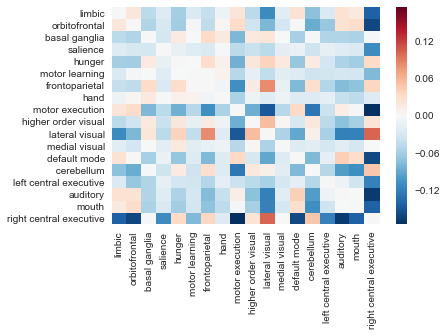

In [104]:
diff = corrmats['phy'] - corrmats['gen']
sns.heatmap(diff, xticklabels=labels, yticklabels=labels)